# 결정트리를 이용한 멜버른 집값 예측

Decision Tree: 0.405412915944668 <br/>
Light GBM: 0.7166618912536572

Automatically created module for IPython interactive environment


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


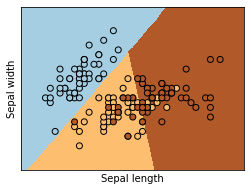

In [ ]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5, penalty='none')
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Automatically created module for IPython interactive environment


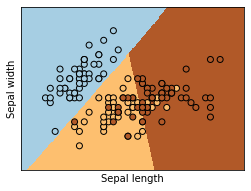

In [ ]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5, class_weight={0:1, 1:1, 2:1})
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[0]

array([9.98947969e-01, 1.04631599e-03, 5.71511036e-06])

In [ ]:
logreg.classes_

array([0, 1, 2])

## 데이터 불러오기, 모델 학습 및 예측

In [212]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from matplotlib import pyplot as plt
import seaborn as sns

In [213]:
melbourne_file_path = 'drive/MyDrive/data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [214]:
y = melbourne_data.Price
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [215]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [216]:
# NaN의 갯수를 범주별로 더하고, 정렬하여 어떤 것 항목에 많이 있는지 확인
melbourne_data.isna().sum().sort_values(ascending=False) 

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

In [217]:
# 갯수로 보는 것보다 비율로 보는게 더 이해하기 쉬울 수 있으므로 전체 결측치 수의 비율로 계산
(melbourne_data.isna().sum() * 100 / melbourne_data.isna().count()).sort_values(ascending=False)

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Propertycount     0.000000
Date              0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Bedroom2          0.000000
Distance          0.000000
Postcode          0.000000
Regionname        0.000000
Bathroom          0.000000
Landsize          0.000000
Lattitude         0.000000
Longtitude        0.000000
Suburb            0.000000
dtype: float64

In [218]:
# 결측치가 있는 클래스들에 대해서 출력
melbourne_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe(include='all')

,BuildingArea,YearBuilt,CouncilArea,Car
count,7130.000000,8205.000000,12211,13518.000000
unique,NaN,NaN,33,NaN
top,NaN,NaN,Moreland,NaN
freq,NaN,NaN,1163,NaN
mean,151.967650,1964.684217,NaN,1.610075
std,541.014538,37.273762,NaN,0.962634
min,0.000000,1196.000000,NaN,0.000000
25%,93.000000,1940.000000,NaN,1.000000
50%,126.000000,1970.000000,NaN,2.000000
75%,174.000000,1999.000000,NaN,2.000000


In [219]:
melbourne_data['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

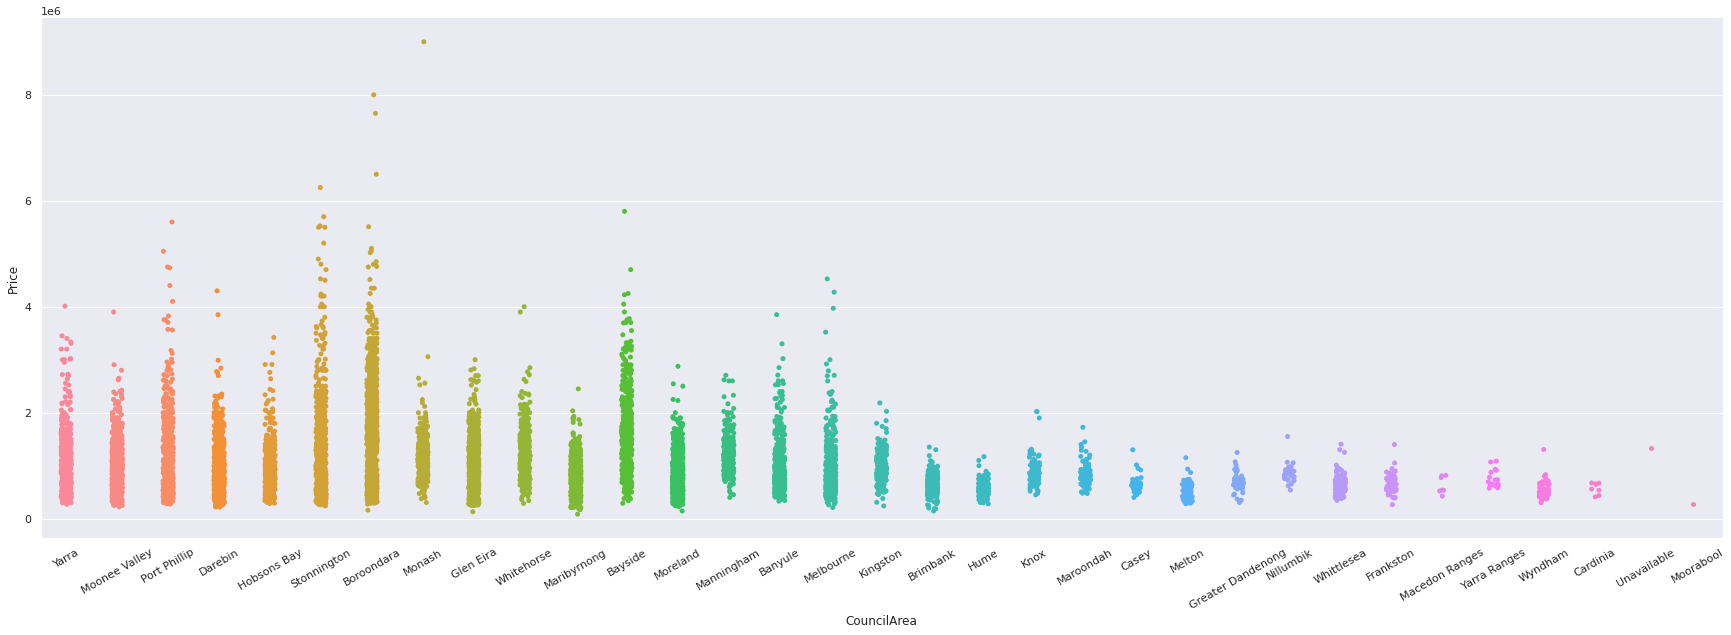

In [220]:
import seaborn as sns

#sns.set(rc={'figure.figsize':(16,16)})
char = sns.catplot(x="CouncilArea", y="Price", data=melbourne_data, height=8, aspect=24/8)
char.set_xticklabels(rotation=30)

In [221]:
melbourne_data['CouncilArea'] = melbourne_data['CouncilArea'].fillna('Moreland') # 가장 많이 등장한 값인 moreland도 채움

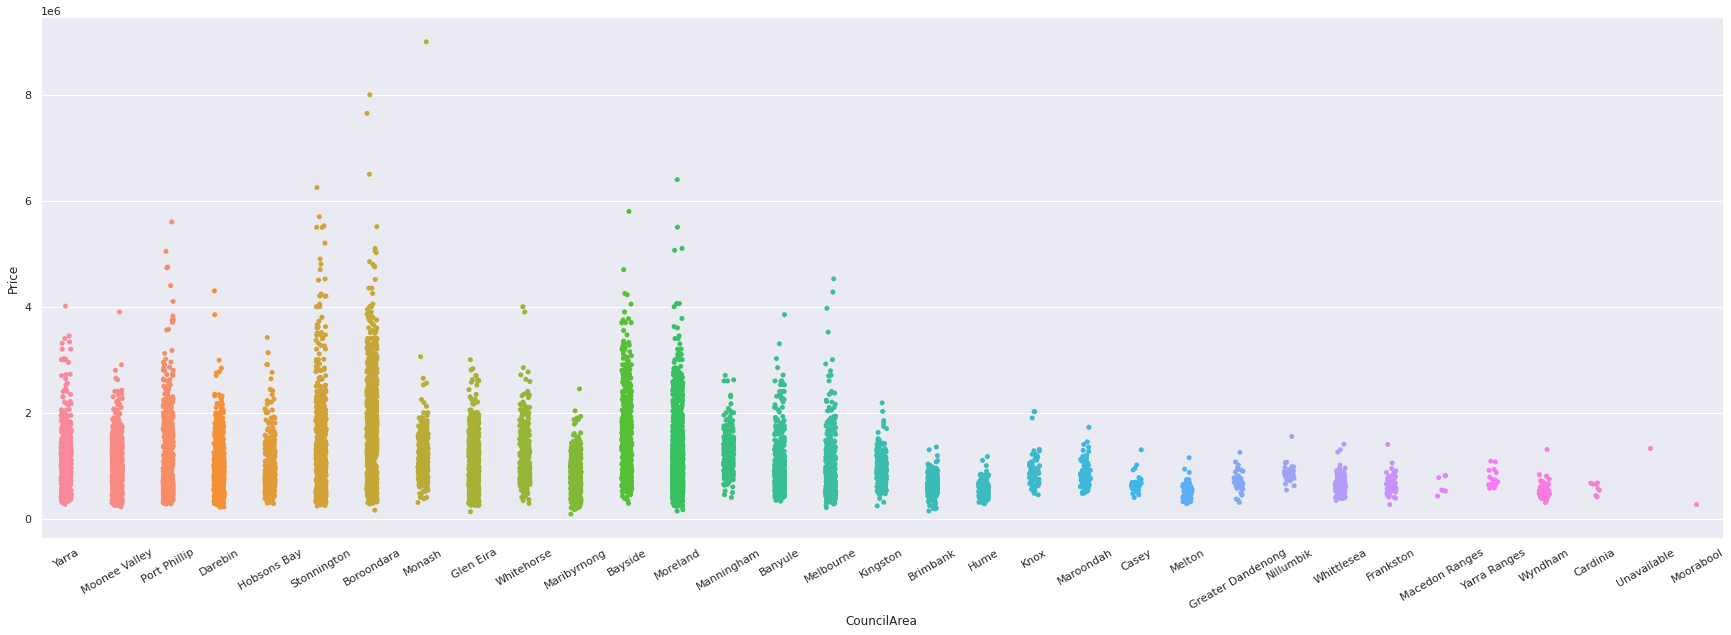

In [222]:
char = sns.catplot(x="CouncilArea", y="Price", data=melbourne_data, height=8, aspect=24/8)
char.set_xticklabels(rotation=30)

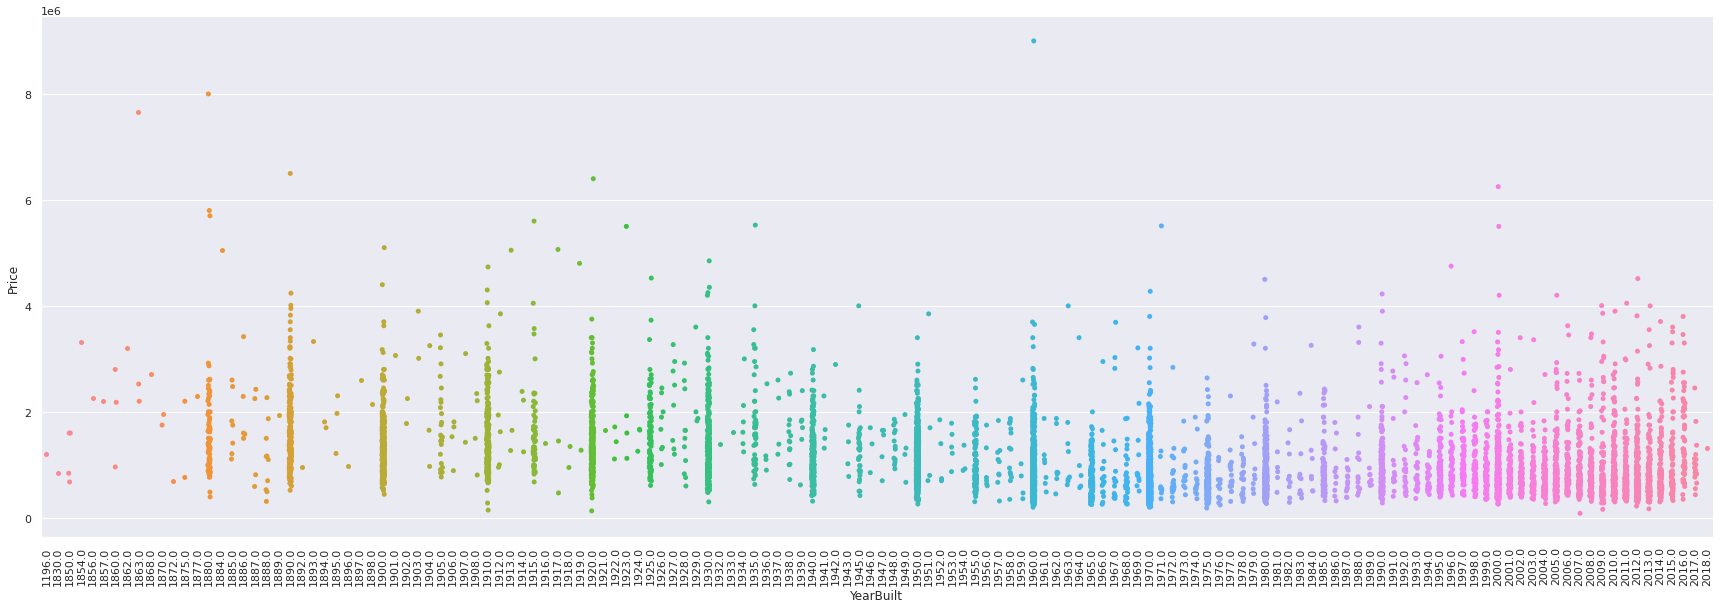

In [223]:
chart = sns.catplot(x='YearBuilt', y='Price', data=melbourne_data, height=8, aspect=24/8)
chart.set_xticklabels(rotation=90)

In [224]:
melbourne_data['YearBuilt'].median()

1970.0

In [225]:
melbourne_data['YearBuilt'] = melbourne_data['YearBuilt'].fillna(melbourne_data['YearBuilt'].median()) # 설립 연도의 경우에는 중간값으로 채움

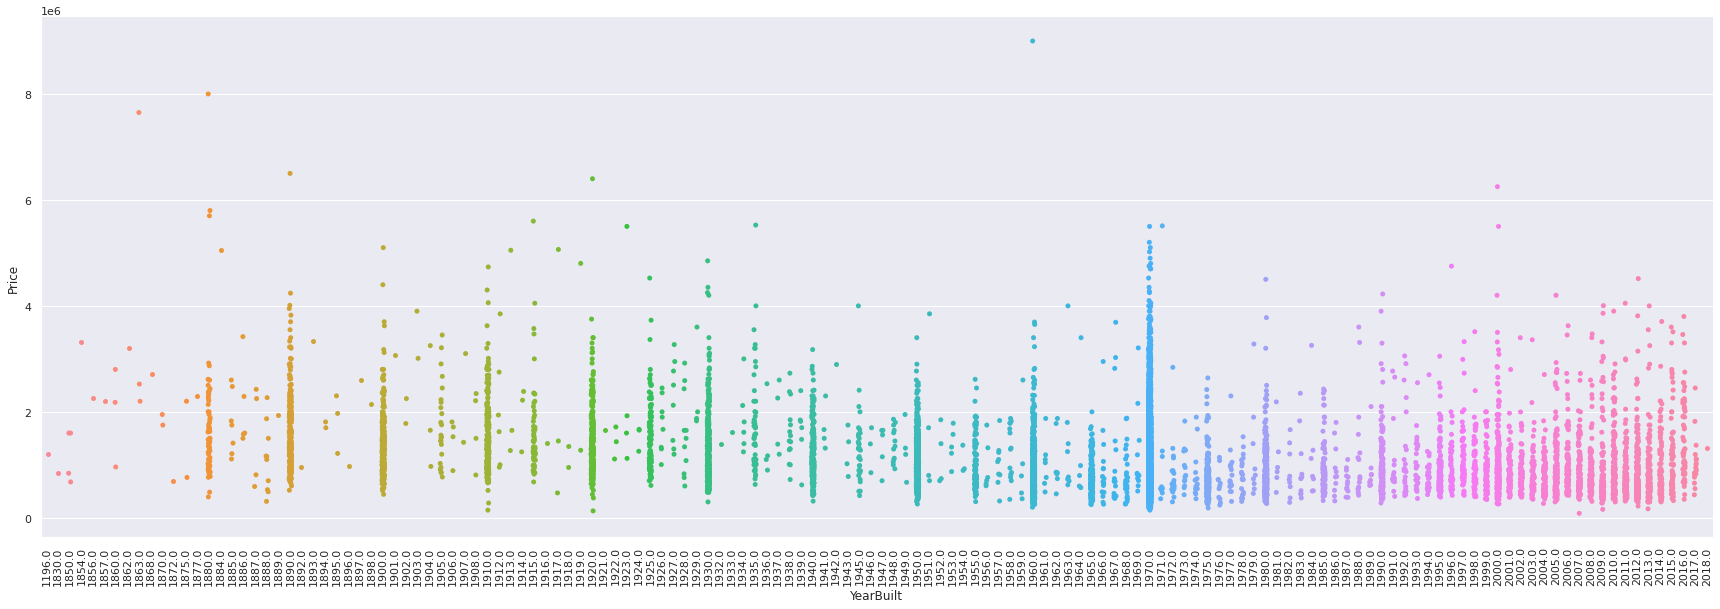

In [226]:
chart = sns.catplot(x='YearBuilt', y='Price', data=melbourne_data, height=8, aspect=24/8)
chart.set_xticklabels(rotation=90)

In [227]:
melbourne_data['BuildingArea'] = melbourne_data['BuildingArea'].fillna(melbourne_data['BuildingArea'].mean()) # 평균값으로 채움

In [228]:
melbourne_data['Car'] = melbourne_data['Car'].fillna(melbourne_data['Car'].median()) # 중간값으로 채움

In [229]:
melbourne_data.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [230]:
categorical_features = melbourne_data.select_dtypes('object').columns
numeric_features = melbourne_data.select_dtypes(['int', 'float']).columns

print( categorical_features, len(categorical_features) )
print( numeric_features , len(numeric_features) )

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object') 8
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object') 13


In [231]:
for col in categorical_features:
    print("Uniq val of "+ col + " =",  len(melbourne_data[col].unique()))

Uniq val of Suburb = 314
Uniq val of Address = 13378
Uniq val of Type = 3
Uniq val of Method = 5
Uniq val of SellerG = 268
Uniq val of Date = 58
Uniq val of CouncilArea = 33
Uniq val of Regionname = 8


In [232]:
# categorical_features = categorical_features.drop('Address') # 범주가 너무 많아서 제거
# categorical_features = categorical_features.drop('SellerG') # 범주가 너무 많아서 제거
# categorical_features = categorical_features.drop('Suburb') # 범주가 너무 많아서 제거
categorical_features = categorical_features.drop(['Address', 'SellerG', 'Suburb'])

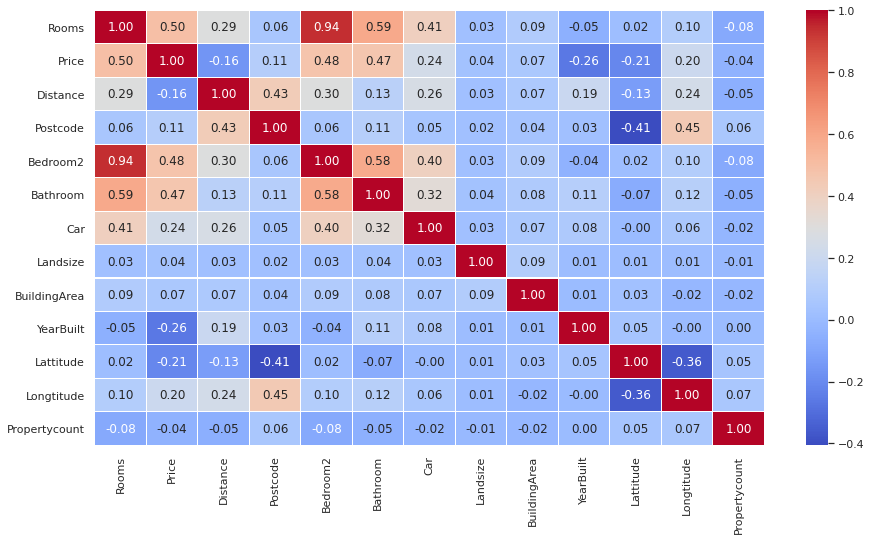

In [233]:
corr_ = melbourne_data[numeric_features].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

In [234]:
melbourne_data['LandR'] = melbourne_data['Landsize'] / melbourne_data['Rooms']
melbourne_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,LandR
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,101.000000
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,78.000000
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,44.666667
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,31.333333
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,163.000000
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0,111.000000
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0,145.333333
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0,216.500000


In [235]:
numeric_features = numeric_features.append(pd.Index(['LandR']))
numeric_features

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'LandR'],
      dtype='object')

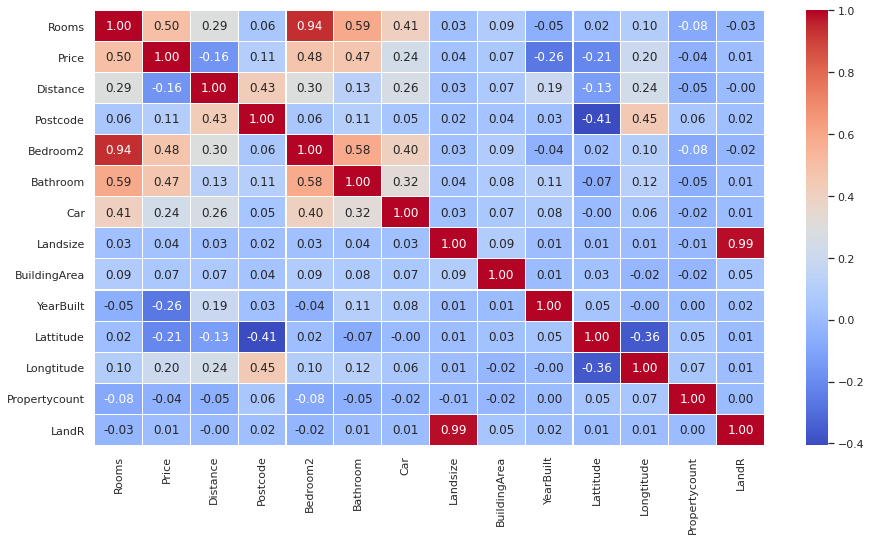

In [236]:
corr_ = melbourne_data[numeric_features].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_, fmt='.2f', linewidths=0.1, annot=True, cmap='coolwarm')
plt.show()

In [237]:
melbourne_data['Method'].value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [238]:
melbourne_data['Method'].values

array(['S', 'S', 'SP', ..., 'S', 'PI', 'SP'], dtype=object)

In [239]:
melbourne_data['Method'].values.reshape(-1,1)

array([['S'],
       ['S'],
       ['SP'],
       ...,
       ['S'],
       ['PI'],
       ['SP']], dtype=object)

In [240]:
[x*2 for x in range(5)]

[0, 2, 4, 6, 8]

In [241]:
column = 'Type'
['{}_{}'.format(column,i) for i in range(len(encoder.categories_[0]))]

['Type_0',
 'Type_1',
 'Type_2',
 'Type_3',
 'Type_4',
 'Type_5',
 'Type_6',
 'Type_7']

In [242]:
for column in categorical_features:    
    if column in ['Method', 'Regionname']:
      encoder = OneHotEncoder()
      encoder.fit(melbourne_data[column].values.reshape(-1,1))
      df_new_feat = pd.DataFrame(encoder.transform(melbourne_data[column].values.reshape(-1,1)).toarray(), columns=['{}_{}'.format(column,i) for i in range(len(encoder.categories_[0]))])
      melbourne_data = pd.concat([melbourne_data, df_new_feat], axis=1)
    else:
      encoder = LabelEncoder()
      melbourne_data[column] = encoder.fit_transform(melbourne_data[column])
    

In [243]:
for column in ['Method', 'Regionname']:
  categorical_features = categorical_features.append(pd.Index(['{}_{}'.format(column, i) for i in range(len(melbourne_data['Method'].unique()))]))

In [244]:
categorical_features = categorical_features.drop(['Method', 'Regionname'])

training_features = list(numeric_features) + list(categorical_features)
training_features.remove('Price')

In [245]:
minMaxNorm = MinMaxScaler()
minMaxNorm.fit(melbourne_data[training_features])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [246]:
X = minMaxNorm.transform(melbourne_data[training_features]) 

In [247]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

X_pca = pca.transform(X)
X_all = np.concatenate([X, X_pca], axis=1)

[0.22680494 0.17374589 0.1354531  0.09064922]
0.6266531485985671
[63.89000265 55.91958283 49.3743206  40.39138032]


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.1, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12222, 30) (12222,)
(1358, 30) (1358,)


In [249]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBModel

In [250]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.6047526112639487

In [251]:
trained_models = []

for Model in [LinearRegression, Ridge, Lasso, SGDRegressor, HuberRegressor, DecisionTreeRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, XGBModel]:
  model = Model()
  model.fit(X_train, y_train)
  trained_models.append(model)

  print(model)
  if Model == XGBModel:
    print(r2_score(model.predict(X_test), y_test))
  else:
    print(model.score(X_test, y_test))
  print('-'*50)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.6047526112639487
--------------------------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
0.6042790226707833
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125927664026141.5, tolerance: 501614960035.8266
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
0.6045731355339055
--------------------------------------------------
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
0.597629750869008
--------------------------------------------------
HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
0.5273631500133811
--------------------------------------------------
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
     

In [252]:
trained_models[-2].predict(X_test)

array([1681788.88,  809365.  ,  631375.  , ...,  959140.  ,  415665.  ,
       2470675.  ])

## Light GBM

In [253]:
import lightgbm

In [254]:
train_data = lightgbm.Dataset(X_train, label=y_train) #, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [255]:
parameters = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting': 'gbdt',
    'learning_rate': 0.05,
    'feature_fraction': 0.6,
}

In [256]:
lgbm_model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=500,
                       early_stopping_rounds=10)

[1]	valid_0's rmse: 607573
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 589516
[3]	valid_0's rmse: 573219
[4]	valid_0's rmse: 555836
[5]	valid_0's rmse: 540931
[6]	valid_0's rmse: 525047
[7]	valid_0's rmse: 511987
[8]	valid_0's rmse: 498007
[9]	valid_0's rmse: 486044
[10]	valid_0's rmse: 475605
[11]	valid_0's rmse: 465568
[12]	valid_0's rmse: 454456
[13]	valid_0's rmse: 444062
[14]	valid_0's rmse: 436783
[15]	valid_0's rmse: 428509
[16]	valid_0's rmse: 420683
[17]	valid_0's rmse: 412629
[18]	valid_0's rmse: 405318
[19]	valid_0's rmse: 398629
[20]	valid_0's rmse: 393401
[21]	valid_0's rmse: 387394
[22]	valid_0's rmse: 382137
[23]	valid_0's rmse: 376628
[24]	valid_0's rmse: 371376
[25]	valid_0's rmse: 366373
[26]	valid_0's rmse: 361214
[27]	valid_0's rmse: 356182
[28]	valid_0's rmse: 351715
[29]	valid_0's rmse: 347667
[30]	valid_0's rmse: 343691
[31]	valid_0's rmse: 340239
[32]	valid_0's rmse: 337155
[33]	valid_0's rmse: 334099
[34]	valid_0's rmse: 33

In [257]:
lgbm_r2 = r2_score(lgbm_model.predict(X_test), y_test)
print(lgbm_r2)

0.804554233003607


# 타이타닉 logistic regression

In [ ]:
!ls drive/MyDrive/train.csv

 0_colab   21_ls   3_tf_v2.ipynb  'Colab Notebooks'   share   train.csv   wheat


In [ ]:
import pandas as pd

passengers = pd.read_csv("drive/MyDrive/train.csv")
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
feature = passengers[['Sex', 'Age', 'Pclass']]
y = passengers['Survived']

In [ ]:
feature.isna().sum()

Sex         0
Age       177
Pclass      0
dtype: int64

In [ ]:
#feature['Age'] = feature['Age'].fillna(value=feature['Age'].mean())
feature['Age'].fillna(value=feature['Age'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
feature.isna().sum()

Sex       0
Age       0
Pclass    0
dtype: int64

In [ ]:
feature['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
feature['FirstClass'] = feature['Pclass'].apply(lambda x:1 if x==1 else 0)
feature['SecondClass'] = feature['Pclass'].apply(lambda x:1 if x==2 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
feature = feature[['Sex', 'Age', 'FirstClass', 'SecondClass']]
feature

,Sex,Age,FirstClass,SecondClass
0,male,22.000000,0,0
1,female,38.000000,1,0
2,female,26.000000,0,0
3,female,35.000000,1,0
4,male,35.000000,0,0
...,...,...,...,...
886,male,27.000000,0,1
887,female,19.000000,1,0
888,female,29.699118,0,0
889,male,26.000000,1,0


In [ ]:
feature['Sex'] = feature['Sex'].map({'female':0, 'male':1})
feature

,Sex,Age,FirstClass,SecondClass
0,1,22.000000,0,0
1,0,38.000000,1,0
2,0,26.000000,0,0
3,0,35.000000,1,0
4,1,35.000000,0,0
...,...,...,...,...
886,1,27.000000,0,1
887,0,19.000000,1,0
888,0,29.699118,0,0
889,1,26.000000,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X = feature

In [ ]:
#X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_test, y_test)

0.7892376681614349